In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform

---
# Tarea 5 Estadística 2020-02
---
* Diego Andrés Gómez Polo
* Daniel Alzate
---


# 1

In [110]:
np.random.seed(0)
N = 15000
f = lambda x,y: np.exp(-1 * x**2 * y**3)
sampling = lambda n: uniform.rvs(size=n)
simulations = []
realValue = 0.928885
delta = 0.01

for i in range(1000):
    [X_i, Y_i, Z_i] = [sampling(N) for _ in range(3)]
    func = f(X_i, Y_i)
    W = np.less_equal(Z_i, func).astype(int)
    stimator = np.mean(W)
    simulations.append(stimator)

simulations = np.array(simulations)
simulations_mean = np.mean(simulations)
error = 1 - ((realValue - delta  < simulations) & (simulations < realValue + delta)).sum() / len(simulations)
error*=100
print(f'Intervalo = ({realValue - delta},{realValue + delta})')
print(f'{round(error, 4)}% fuera del intervalo definido')
print(f'Media de las simulaciones: {simulations_mean}')

Intervalo = (0.918885,0.938885)
0.0% fuera del intervalo definido
Media de las simulaciones: 0.9289721333333334


## Graph

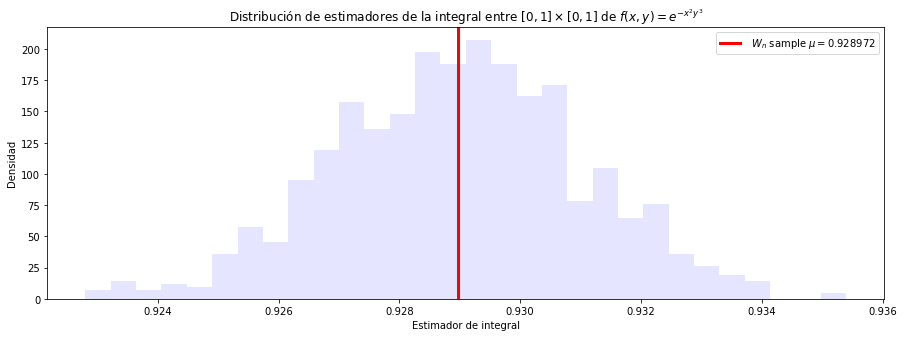

In [113]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(simulations, 30, alpha=0.1, density=True, color='b')
plt.axvline(x=simulations_mean, color='r', lw=3, label= f' $W_n$ sample $\mu = {round(simulations_mean, 6)}$')
plt.xlabel("Estimador de integral")
plt.ylabel("Densidad")
plt.title('Distribución de estimadores de la integral entre $[0,1]\\times[0,1]$ de $f(x,y)= e^{-x^2 y^3}$')
plt.legend()
plt.show()